# Bukit Timah Nature Reserve Ecology Analysis

# Contents 
1. [Preparing Data](#1.-Preparing-Data)<br> 
2. [Using the CTFS R Package](#2.-Using-the-CTFS-R-package)<br>
3. [Data Wrangling and Cleaning](#3.-Data-Wrangling-and-Cleaning)<br>
4. [Plotting distribution of species](#Task-1:-Plotting-distribution-of-species)<br>
5. [Boxplot Plotting](#Task-2:-Boxplot-Plotting)<br>
6. [Scatterplot plotting](#Task-3:-Scatterplot-plotting)<br>
7. [Links for context](#7.-Links-for-context)

# 1. Preparing Data 

In [57]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(plotly)
library(ggpubr)
options(warn=-1)

In [2]:
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/bts.full1.rdata')
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/bts.full2.rdata')
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/bts.full3.rdata')

load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/btp.spptable.rdata')
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/btp.full1.rdata')
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/btp.full2.rdata')
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/btp.full4.rdata')
load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/btp.full5.rdata')

load('C:/Users/delim/Desktop/T.ECOLOGY R-package/Ecology Analysis and Dataset/CTFSRPackage.rdata')


In [3]:
head(bukittimahprimary.full5)

treeID,stemID,tag,StemTag,sp,quadrat,gx,gy,MeasureID,CensusID,dbh,pom,hom,ExactDate,DFstatus,codes,nostems,status,date,agb
10243,1,1541,,NEOSKI,C1,55.6,18.3,12621,6,NA,0,0.0,2007-12-28,dead,D,1,D,17528,0.0000000000
10244,1,1542,,MEMEPU,C1,55.2,17.8,12620,6,NA,0,0.0,2007-12-28,dead,D,1,D,17528,0.0000000000
10245,1,1543,,POPOTO,C1,55.4,16.4,12619,6,175,1.3,1.3,2007-12-28,alive,NA,1,A,17528,0.1606039897
10246,1,1544,,CANAPA,C1,56.8,15.9,12618,6,128,1.3,1.3,2007-12-28,alive,NA,1,A,17528,0.0701080768
10247,1,1545,,CANAPA,C1,57.6,15.0,12617,6,15,1.3,1.3,2007-12-28,alive,NA,1,A,17528,0.0003003303
10248,1,1547,,STREEL,C1,57.7,16.1,12616,6,13,1.3,1.3,2007-12-28,alive,NA,1,A,17528,0.0003282197


# 2. Using the CTFS R package

### Calculating recruitment rates between 2 censuses for 1 species

In [4]:
recruit45KNEMPA <- recruitment(bukittimahprimary.full4, bukittimahprimary.full5, split1 = bukittimahprimary.full1$KNEMPA)

### Calculating recruitment rates betweeen 2 censuses for all species

Primary forest between full1 & full2, full2 & full4, full4 & full5

In [5]:
recruitment12.df <- data.frame(recruitment(bukittimahprimary.full1, bukittimahprimary.full2, split1 = bukittimahprimary.full1$sp))

In [6]:
recruitment24.df <- data.frame(recruitment(bukittimahprimary.full2, bukittimahprimary.full4, split1 = bukittimahprimary.full2$sp))

In [7]:
recruitment45.df <- data.frame(recruitment(bukittimahprimary.full4, bukittimahprimary.full5, split1 = bukittimahprimary.full4$sp))

Secondary forest between full1 & full2, full2 & full3 

In [8]:
s_recruitment12.df <- data.frame(recruitment(bukit_timah_secondary.full1, bukit_timah_secondary.full2, split1 = bukit_timah_secondary.full1$sp))

In [9]:
s_recruitment23.df <- data.frame(recruitment(bukit_timah_secondary.full2, bukit_timah_secondary.full3, split1 = bukit_timah_secondary.full2$sp))

### Calculating recruitment rate between 2 censuses as a whole forest

In [10]:
recruitment(bukittimahprimary.full1, bukittimahprimary.full2)

$N2
[1] 13840

$R
[1] 1615

$rate
[1] 0.04884219

$lower
[1] 0.04651342

$upper
[1] 0.05128151

$time
[1] 2.540425

$date1
[1] 12199.57

$date2
[1] 13127.01

### Calculating mortality rates betweeen 2 censuses for all species

In [11]:
mortality12.df <- mortality(bukittimahprimary.full1, bukittimahprimary.full2, split1 = bukittimahprimary.full1$sp)

### Calculating mortality rate between 2 censuses as a whole forest

In [12]:
mortality(bukittimahprimary.full1, bukittimahprimary.full2)

$N
[1] 13468

$D
[1] 442

$rate
[1] 0.01313304

$lower
[1] 0.01196446

$upper
[1] 0.01441535

$time
[1] 2.540854

$date1
[1] 12199.57

$date2
[1] 13127.2

$dbhmean
[1] 38.78873

### Calculating growth rates 

In [13]:
growth(bukittimahprimary.full1, bukittimahprimary.full2, method = 'I')

$rate
[1] 1.08979

$N
[1] 10738

$clim
[1] 0.04187846

$dbhmean
[1] 38.50168

$time
[1] 2.537538

$date1
[1] 12199.44

$date2
[1] 13126.28

In [14]:
growth(bukittimahprimary.full1, bukittimahprimary.full2, method = 'E')

$rate
[1] 0.03679731

$N
[1] 10738

$clim
[1] 0.001109647

$dbhmean
[1] 38.50168

$time
[1] 2.537538

$date1
[1] 12199.44

$date2
[1] 13126.28

In [15]:
p_growth12.df <- data.frame(growth(bukittimahprimary.full1, bukittimahprimary.full2, split1 = bukittimahprimary.full1$sp))
p_growth24.df <- data.frame(growth(bukittimahprimary.full2, bukittimahprimary.full4, split1 = bukittimahprimary.full2$sp))
p_growth45.df <- data.frame(growth(bukittimahprimary.full4, bukittimahprimary.full5, split1 = bukittimahprimary.full4$sp))

s_growth12.df <- data.frame(growth(bukit_timah_secondary.full1, bukit_timah_secondary.full2, split1 = bukit_timah_secondary.full1$sp))
s_growth23.df <- data.frame(growth(bukit_timah_secondary.full2, bukit_timah_secondary.full3, split1 = bukit_timah_secondary.full2$sp))

In [16]:

# write.csv(p_growth12.df, file = "Sendable/p_growth12.csv")
# write.csv(p_growth24.df, file = "Sendable/p_growth24.csv")
# write.csv(p_growth45.df, file = "Sendable/p_growth45.csv")

# write.csv(s_growth12.df, file = "Sendable/s_growth12.csv")
# write.csv(s_growth23.df, file = "Sendable/s_growth23.csv")

In [17]:
# write.csv(data.frame(recruitment12.df), file = "Sendable/p_recruitment12.csv")
# write.csv(data.frame(recruitment24.df), file = "Sendable/p_recruitment24.csv")
# write.csv(data.frame(recruitment45.df), file = "Sendable/p_recruitment45.csv")
# write.csv(data.frame(s_recruitment12.df), file = "Sendable/s_recruitment12.df.csv")
# write.csv(data.frame(s_recruitment23.df), file = "Sendable/s_recruitment23.df.csv")

In [18]:
size <- cut(bukittimahprimary.full1$dbh, c(10,100,300,1000,10000))
growth(bukittimahprimary.full1, bukittimahprimary.full2, split1 = size)


$rate
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
    0.9387257     3.1058219     4.7778039     3.6055414 

$N
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
         9019           513           159             5 

$clim
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
   0.03689532    0.34156211    0.88457972    2.63286967 

$dbhmean
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     25.93613     170.14815     477.69811    1170.60000 

$time
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     2.537588      2.533147      2.540433      2.623409 

$date1
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     12199.34      12199.97      12201.18      12211.80 

$date2
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     13126.20      13125.20      13129.08      13170.00

In [19]:
growth(bukittimahprimary.full1, bukittimahprimary.full2, method = 'E', split1 = size)

$rate
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
  0.035628162   0.017905985   0.010462386   0.003034576 

$N
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
         9019           513           159             5 

$clim
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
  0.001148953   0.001845508   0.001940211   0.002167074 

$dbhmean
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     25.93613     170.14815     477.69811    1170.60000 

$time
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     2.537588      2.533147      2.540433      2.623409 

$date1
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     12199.34      12199.97      12201.18      12211.80 

$date2
     (10,100]     (100,300]   (300,1e+03] (1e+03,1e+04] 
     13126.20      13125.20      13129.08      13170.00

### <font color = red> Separating data according to species

In [20]:
btpri5 <- split.data(bukittimahprimary.full5, splitcol="sp")

In [21]:
btpri4 <- split.data(bukittimahprimary.full4, splitcol="sp")

In [22]:
btpri2 <- split.data(bukittimahprimary.full2, splitcol="sp")

In [23]:
btsec2 <- split.data(bukit_timah_secondary.full2, splitcol="sp")

### Creating plot distribution maps with map() function using CTFS package

Species STREEL using bukittimahprimary.full5 dataset

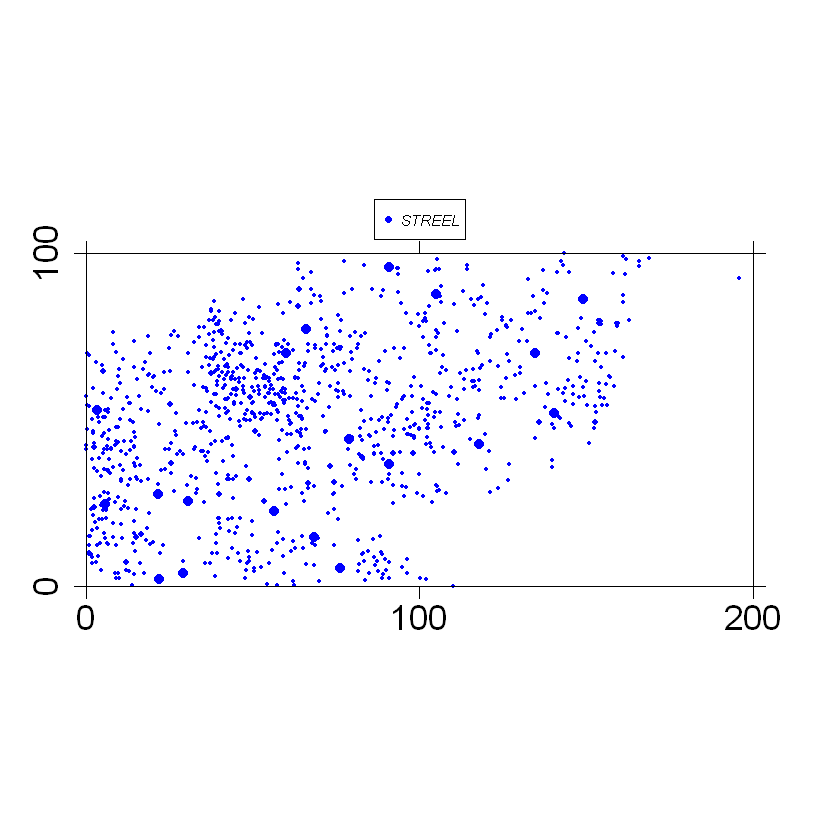

In [24]:
map(splitdatafile=btpri5,species=c('STREEL'),plotdim=c(200,100))

Species STREEL using bukit_timah_secondary.full2 dataset

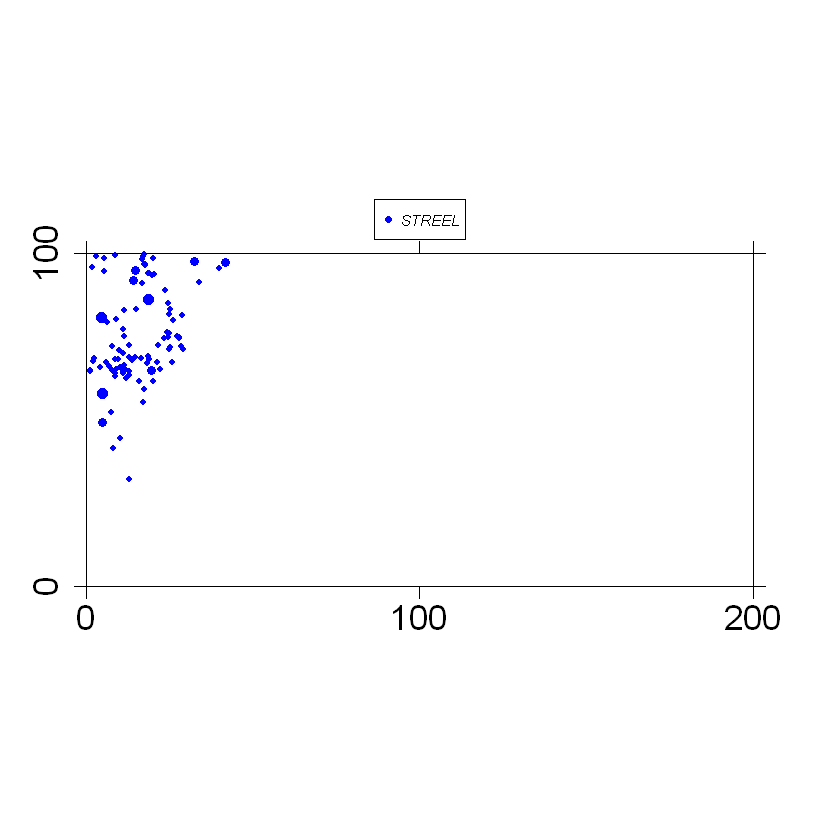

In [25]:
map(splitdatafile=btsec2,species=c('STREEL'),plotdim=c(200,100))

### Export all spatial distribution for primary forest full5 to a pdf

In [26]:
# pdf.allplot(splitdata=btpri5, spplist=bukit_timah_primary.spptable, elev=NULL, 
#             topoint=10, plotdim=c(200,100), 
#             cutoff = c(10, 100, 300, 3000), size =1, 
#             export=TRUE, singlefile=TRUE, bty='n', path = "C:/Users/delim/Desktop")


### Calculate no. of distinct species

In [27]:
n_distinct(bukittimahprimary.full5$sp)

[1] 378

## [Back to top](#Contents) 

# 3. Data Wrangling and Cleaning

Creating dfs for each species to analyse the data

In [28]:
p_streel_df <- btpri5$STREEL
p_shorcu_df <- btpri5$SHORCU
s_streel_df <- btsec2$STREEL
s_shorcu_df <- btsec2$SHORCU

In [29]:
# write.csv(p_streel_df, file = "Sendable/p_streel_pri5.csv")
# write.csv(s_streel_df, file = "Sendable/s_streel_sec2.csv")
# write.csv(p_shorcu_df, file = "Sendable/p_shorcu_pri5.csv")
# write.csv(s_shorcu_df, file = "Sendable/s_shorcu_sec2.csv")

Removing NAs from dbh column and dead trees

In [30]:
p_streel_df <- p_streel_df %>%
    filter(p_streel_df$DFstatus == 'alive') %>%
    drop_na(dbh)

s_streel_df <- s_streel_df %>%
    filter(s_streel_df$DFstatus == 'alive') %>%
    drop_na(dbh)

p_shorcu_df <- p_shorcu_df %>%
    filter(p_shorcu_df$DFstatus == 'alive') %>%
    drop_na(dbh)

s_shorcu_df <- s_shorcu_df %>%
    filter(s_shorcu_df$DFstatus == 'alive') %>%
    drop_na(dbh)

# Task 1: Plotting distribution of species 

- To show the distribution of species count in Bukit Timah Nature Reserve

### Checking whether dates of pri5 tally with sec2 

bukit_timah_secondary.full2 dataset

In [33]:
(bukittimahprimary.full5$ExactDate)

[1] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
    [6] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [11] "2007-12-28" "2007-12-28" "2007-12-26" "2007-12-26" "2007-12-26"
   [16] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [21] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [26] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [31] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [36] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [41] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [46] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [51] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [56] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [61] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [66] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [71] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [76] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
   [81] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-26" "2007-12-26"
   [86] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [91] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
   [96] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [101] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [106] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [111] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [116] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [121] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [126] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
  [131] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
  [136] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
  [141] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-26" "2007-12-26"
  [146] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [151] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [156] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [161] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [166] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [171] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [176] "2007-12-26" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
  [181] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
  [186] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-26" "2007-12-28"
  [191] "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28" "2007-12-28"
  [196] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26"
  [201] "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-26" "2007-12-17"
  [206] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [211] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [216] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [221] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [226] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [231] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [236] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [241] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [246] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [251] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [256] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [261] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [266] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17"
  [271] "2007-12-17" "2007-12-17" "2007-12-17" "2007-12-17" "2

bukittimahprimary.full5 dataset

In [34]:
(bukit_timah_secondary.full2$ExactDate)

[1] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
   [6] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [11] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [16] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [21] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [26] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [31] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [36] "2007-11-13" "2007-11-13" "2007-11-13" "2008-04-09" "2007-11-13"
  [41] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [46] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [51] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [56] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [61] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [66] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [71] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [76] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [81] "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13" "2007-11-13"
  [86] "2007-11-13" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
  [91] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
  [96] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [101] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [106] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [111] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [116] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [121] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [126] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [131] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [136] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [141] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [146] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [151] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [156] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [161] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [166] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [171] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [176] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [181] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [186] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [191] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [196] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [201] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [206] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [211] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [216] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [221] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [226] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [231] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [236] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [241] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [246] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [251] "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07" "2007-11-07"
 [256] "2007-11-07" "2007-11-07" "2007-11-07" "2007-10-01" "2007-10-01"
 [261] "2007-10-01" "2007-10-01" "2007-10-01" "2007-10-01" "2007-10-01"
 [266] "2007-10-01" "2007-10-01" "2007-10-01" "2007-10-01" "2007-10-01"
 [271] "2007-10-01" "2007-10-01" "2007-10-01" "2007-10-01" "2007-10-01"
 [276] "2007-10-01" "2007-10-01" "2007-10-0

### Data wrangling pri5 dataset

In [35]:
trees_alive_pri_5 <- 
bukittimahprimary.full5 %>%
  filter(status == "A") %>%
  group_by(sp)
ptree5.df <- data.frame(table(trees_alive_pri_5$sp))

In [36]:
names(ptree5.df)[1] <- "Species"
names(ptree5.df)[2] <- "Count"
head(ptree5.df)

Species,Count
AAAAAA,11
ACHRPO,1
ACTEEX,5
ACTIML,43
ADENMA,17
ADINDU,2


In [37]:
n_distinct(trees_alive_pri_5$sp) -1

[1] 346

### Plotting 

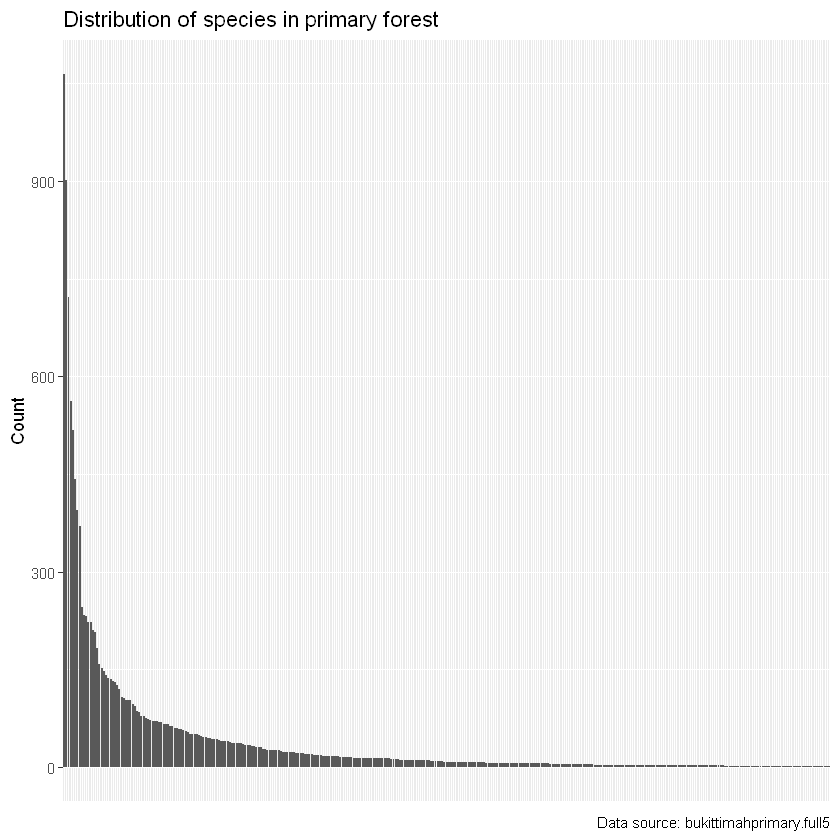

In [38]:
ggplot(ptree5.df, aes(reorder(Species, -Count), Count)) + geom_col() + 
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) + 
labs(
    x = "Species rank",
    y = "Count",
    title = "Distribution of species in primary forest",
    caption = "Data source: bukittimahprimary.full5"
  )

### Data wrangling sec2 dataset

In [39]:
trees_alive_sec_2 <- 
bukit_timah_secondary.full2 %>%
  filter(status == "A") %>%
  group_by(sp)
stree2.df <- data.frame(table(trees_alive_sec_2$sp))

In [40]:
names(stree2.df)[1] <- "Species"
names(stree2.df)[2] <- "Count"
head(stree2.df)

Species,Count
AAAAAA,6
ACACAU,2
ACTIML,1
ADENMA,8
ADINDU,463
AIDIWA,1


In [41]:
n_distinct(trees_alive_sec_2$sp) 

[1] 200

### Plotting

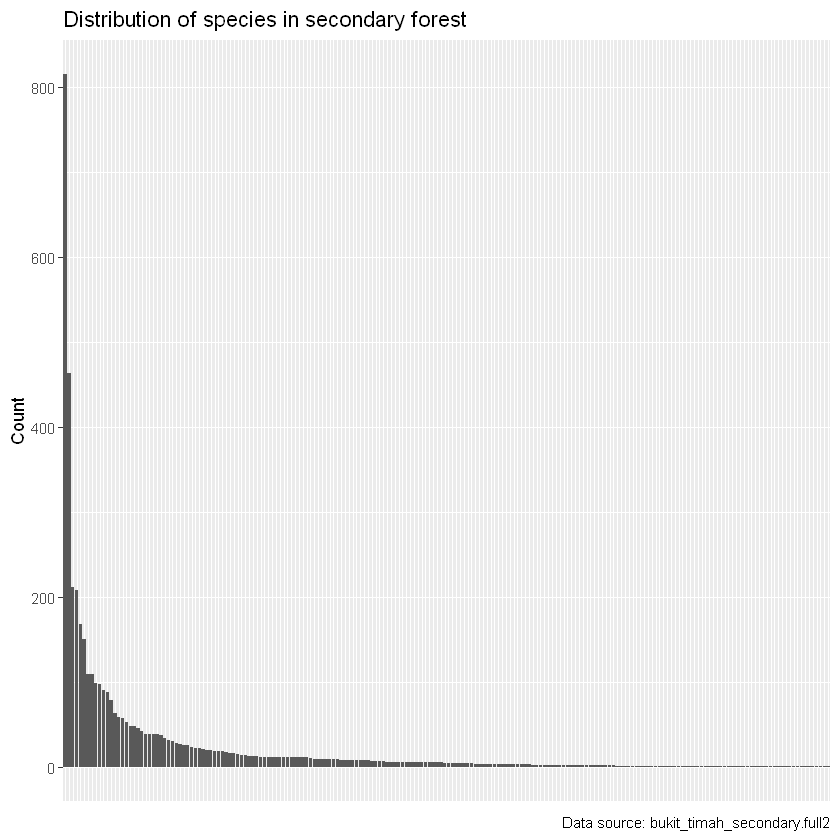

In [42]:
ggplot(stree2.df, aes(reorder(Species, -Count), Count)) + geom_col() + 
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) + 
  labs(
    x = "Species rank",
    y = "Count",
    title = "Distribution of species in secondary forest",
    caption = "Data source: bukit_timah_secondary.full2"
  )

## [Back to top](#Contents) 

# Task 2: Boxplot Plotting

- To show the distribution of dbh of the 2 species in pri and sec forest <br>

Calculating the distribution of dbh for STREEL in year 2007-2008

In [58]:
print('_________PRIMARY STREEL___________')
summary(p_streel_df$dbh)
print('_________SECONDARY STREEL___________')
summary(s_streel_df$dbh)

[1] "_________PRIMARY STREEL___________"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   14.00   19.00   35.38   30.00  587.00 

[1] "_________SECONDARY STREEL___________"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   13.00   17.00   39.99   29.75  531.00 

Calculating the distribution of dbh for SHORCU in year 2007-2008

In [59]:
print('_________PRIMARY SHORCU___________')
summary(p_shorcu_df$dbh)
print('_________SECONDARY SHORCU___________')
summary(s_shorcu_df$dbh)

[1] "_________PRIMARY SHORCU___________"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   16.00   24.00   90.47   55.00 1293.00 

[1] "_________SECONDARY SHORCU___________"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   16.00   26.00   92.59   42.00 1433.00 

### STREEL 

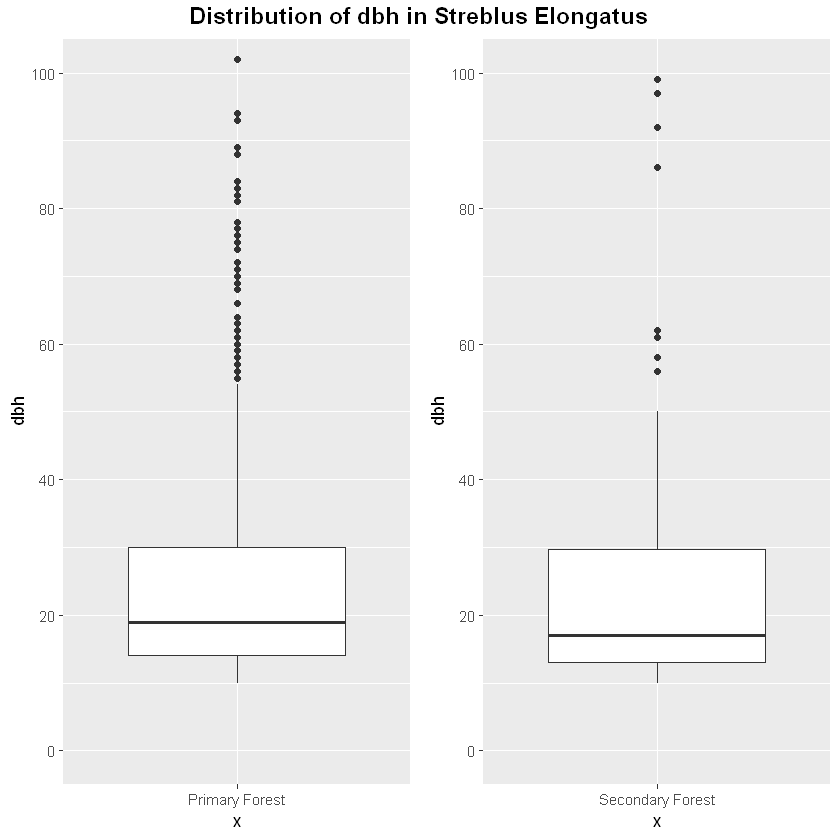

In [43]:
streel_box1 <- ggplot(data = p_streel_df, aes(x = "Primary Forest", dbh)) + geom_boxplot() +
  coord_cartesian(ylim = c(0, 100)) +
  scale_y_continuous(breaks=seq(0,100,20))
streel_box2 <- ggplot(data = s_streel_df, aes(x = "Secondary Forest", dbh)) + geom_boxplot() +
  coord_cartesian(ylim = c(0, 100)) +
  scale_y_continuous(breaks=seq(0,100,20))

streel_plot <- ggarrange(streel_box1, streel_box2, ncol = 2) 
annotate_figure(streel_plot, top = text_grob("Distribution of dbh in Streblus Elongatus", size = 14, face = 'bold'))

### SHORCU

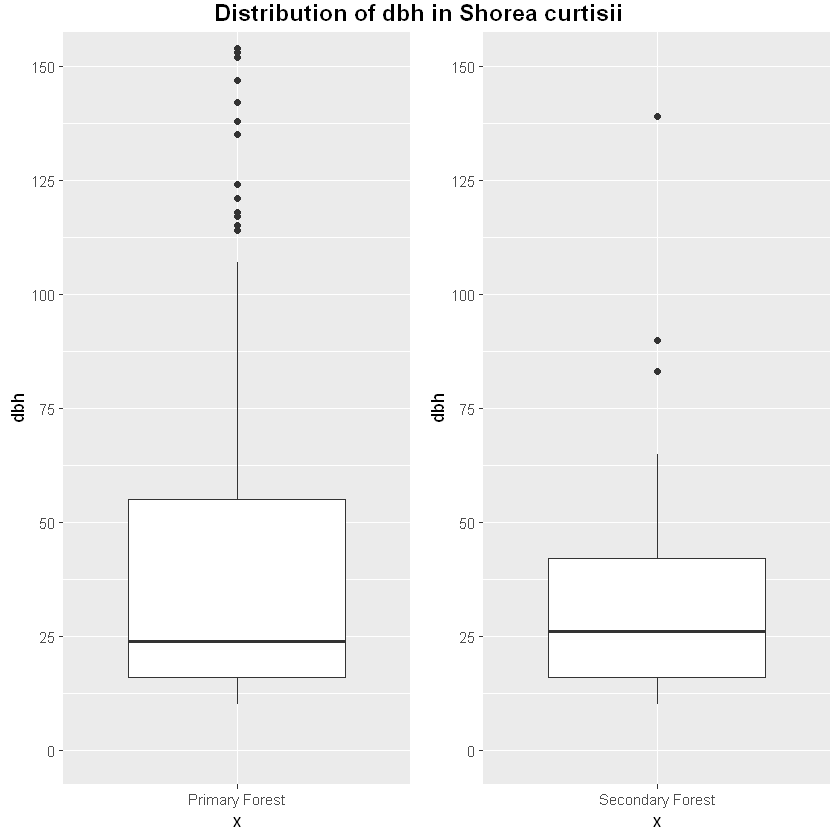

In [44]:
shorcu_box1 <- ggplot(data = p_shorcu_df, aes(x = "Primary Forest", dbh)) + geom_boxplot() +
  coord_cartesian(ylim = c(0, 150)) +
  scale_y_continuous(breaks=seq(0,150,25))
shorcu_box2 <- ggplot(data = s_shorcu_df, aes(x = "Secondary Forest", dbh)) + geom_boxplot() +
  coord_cartesian(ylim = c(0, 150)) +
  scale_y_continuous(breaks=seq(0,150,25))

shorcu_plot <- ggarrange(shorcu_box1, shorcu_box2, ncol = 2) 
annotate_figure(shorcu_plot, top = text_grob("Distribution of dbh in Shorea curtisii", size = 14, face = 'bold'))

## [Back to top](#Contents) 

# Task 3: Scatterplot plotting

To show the spatial distribution of the two species STREEL and SHORCU 
- dbh as size
- color different for top 25%

### Primary Streel

In [45]:
p_streel_df <- p_streel_df %>%
    mutate(top_25 = if_else(dbh > 30, '>30 cm dbh', '10-30 cm dbh'))

In [46]:
size_class <- factor(p_streel_df$top_25)

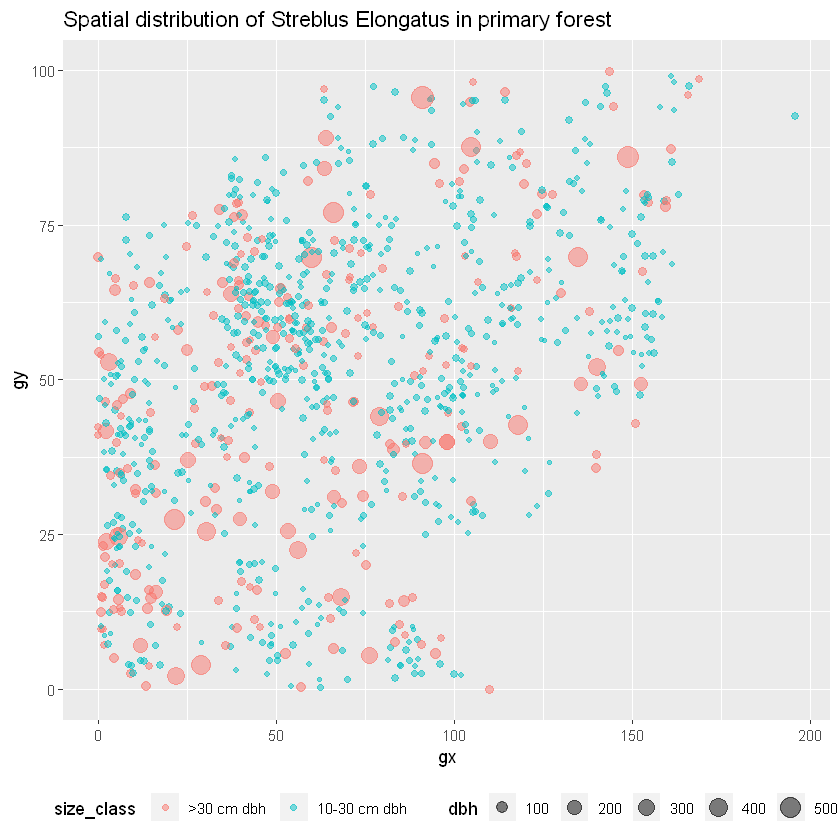

In [47]:
ggplot(p_streel_df, aes(x=gx, y=gy, size=dbh, color=size_class)) +
    geom_point(alpha = 0.5) + 
    theme(legend.position = "bottom") + 
    labs(title = 'Spatial distribution of Streblus Elongatus in primary forest')

ggsave(file="Sendable/primary_streel.png", width=8, height=5, dpi=300)

### Secondary Streel

In [48]:
s_streel_df <- s_streel_df %>%
    mutate(top_25 = if_else(dbh > 29.75, '>29.75 cm dbh', '10-29.75 cm dbh'))


In [49]:
size_class <- factor(s_streel_df$top_25)

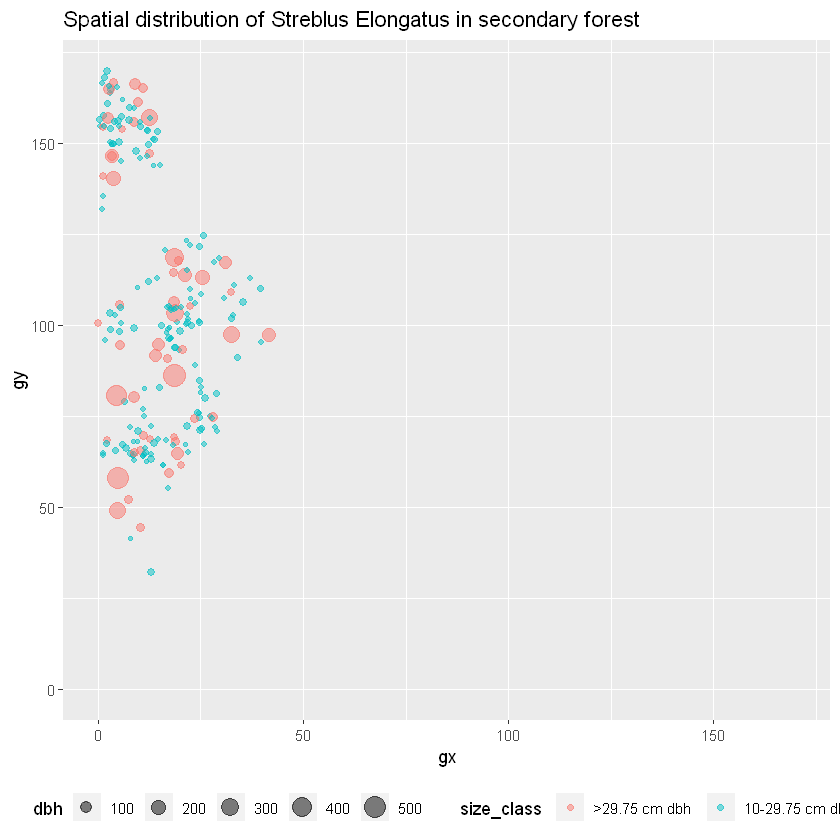

In [50]:
ggplot(s_streel_df, aes(x=gx, y=gy, size=dbh, color=size_class)) +
    geom_point(alpha = 0.5) + 
    theme(legend.position = "bottom") + 
    labs(title = 'Spatial distribution of Streblus Elongatus in secondary forest') + 
    coord_cartesian(ylim = c(0, 170), xlim = c(0, 170)) 

ggsave(file="Sendable/secondary_streel.png", width=7.5, height=7.5, dpi=300)

### Primary SHORCU

In [51]:
p_shorcu_df <- p_shorcu_df %>%
    mutate(top_25 = if_else(dbh > 55, '>55 cm dbh', '10-55 cm dbh'))


In [52]:
size_class <- factor(p_shorcu_df$top_25)

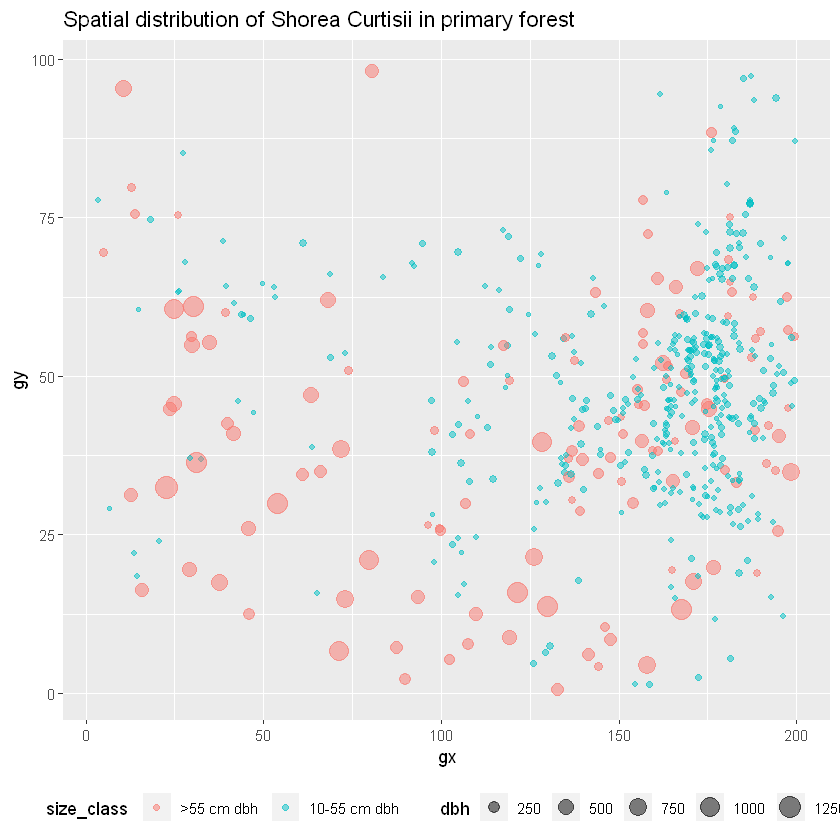

In [53]:
ggplot(p_shorcu_df, aes(x=gx, y=gy, size=dbh, color=size_class)) +
    geom_point(alpha = 0.5) + 
    theme(legend.position = "bottom") + 
    labs(title = 'Spatial distribution of Shorea Curtisii in primary forest')

ggsave(file="Sendable/primary_shorcu.png", width=8, height=5, dpi=300)

### Secondary SHORCU

In [54]:
s_shorcu_df <- s_shorcu_df %>%
    mutate(top_25 = if_else(dbh > 42, '>42 cm dbh', '10-42 cm dbh'))


In [55]:
size_class <- factor(s_shorcu_df$top_25)

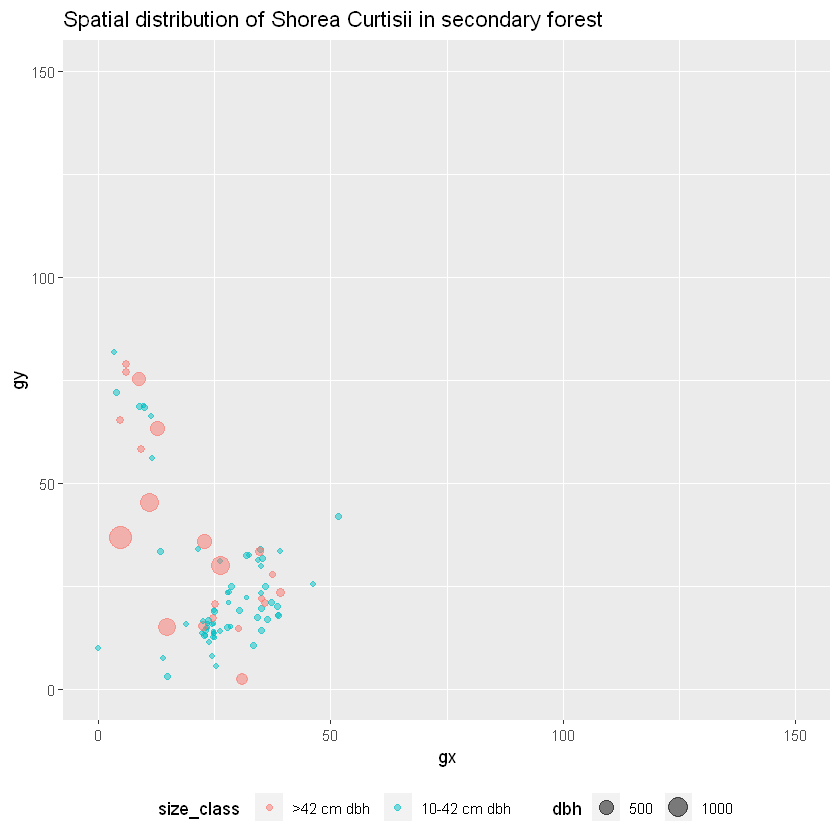

In [56]:
ggplot(s_shorcu_df, aes(x=gx, y=gy, size=dbh, color=size_class)) +
    geom_point(alpha = 0.5) + 
    theme(legend.position = "bottom") + 
    labs(title = 'Spatial distribution of Shorea Curtisii in secondary forest') + 
    coord_cartesian(ylim = c(0, 150), xlim = c(0, 150))  

ggsave(file="Sendable/secondary_shorcu.png", width=7.5, height=7.5, dpi=300)

## [Back to top](#Contents) 

# 7. Links for context

1. [CTFS Documentation](http://ctfs.si.edu/Public/CTFSRPackage/)
2. [Attribute Information](http://ctfs.si.edu/Public/CTFSRPackage/index.php/web/data_format/tree_data)
3. [Data Source](http://ctfs.si.edu/datarequest/index.php/main/region/tree/asia)

<b>About Data</b>: The 2-ha Forest Dynamics Plot, established in 1993, lies within the Bukit Timah Nature Reserve, located in the center of the small island state of Singapore. The reserve encompasses approximately 125 ha of forest on the slopes of Bukit Timah hill, rising to 163 m above sea level. The reserve, two thirds of which is primary forest, lies in the center of the island, 8 km from the city center and adjacent to a highly developed urban area. Since 1985, a six-lane expressway has separated the nature reserve from a 2600-ha parcel of 50-year old secondary forest of the Central Water Catchment.
The 2-ha plot is located in primary forest, just off of one of the reserve's major hiking trails. A second 2-ha Forest Dynamics Plot has been established nearby in secondary forest.
The Bukit Timah Forest Dynamics Plot is a collaboration between the National Institute of Education of Nanyang Technological University and the Center for Tropical Forest Science.